In [1]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *
import      time
spectra_path        =   '../BRILLOUIN/Claudia/DaticellBoniPuntiDoppi/'
spectra_filename    =   '20191218_K27M'

VIPA_path           =   '../BRILLOUIN/Claudia/DaticellBoniPuntiDoppi/picchi_elastici_con_filtro_100msexp/Pos0/'
VIPA_filename       =   'img_000000000_Default_000.tif'

now_path            =   '../BRILLOUIN/'+spectra_filename+'_analysis_all/'
try_path            =   '../BRILLOUIN/'+spectra_filename+'_analysis_all/try/'

cols      = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')


syg_kwargs   =   {'height': 20, 'distance': 20, 'width': 5.}

row = 79/86 col = 22/84
Passo row = 79/86 col = 23/84
Passo row = 79/86 col = 24/84
Passo row = 79/86 col = 25/84
Passo row = 79/86 col = 26/84
Passo row = 79/86 col = 27/84
Passo row = 79/86 col = 28/84
Passo row = 79/86 col = 29/84
Passo row = 79/86 col = 30/84
Spettro invisibile
Passo row = 79/86 col = 31/84
Spettro invisibile
Passo row = 79/86 col = 32/84
Passo row = 79/86 col = 33/84
Passo row = 79/86 col = 34/84
Passo row = 79/86 col = 35/84
Spettro invisibile
Passo row = 79/86 col = 36/84
Passo row = 79/86 col = 37/84
Passo row = 79/86 col = 38/84
Passo row = 79/86 col = 39/84
Passo row = 79/86 col = 40/84
Passo row = 79/86 col = 41/84
Passo row = 79/86 col = 42/84
Passo row = 79/86 col = 43/84
Passo row = 79/86 col = 44/84
Passo row = 79/86 col = 45/84
Passo row = 79/86 col = 46/84
Passo row = 79/86 col = 47/84
Passo row = 79/86 col = 48/84
Passo row = 79/86 col = 49/84
Passo row = 79/86 col = 50/84
Passo row = 79/86 col = 51/84
Passo row = 79/86 col = 52/84
Passo row = 79/86 c

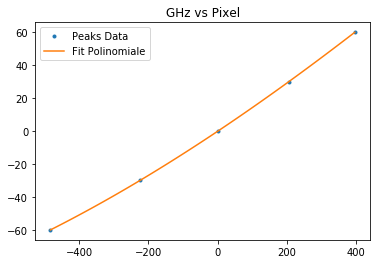

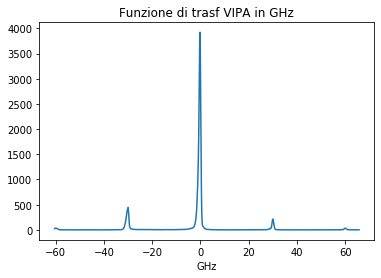

/86 col = 4/84
Passo row = 78/86 col = 5/84
Passo row = 78/86 col = 6/84
Passo row = 78/86 col = 7/84
Passo row = 78/86 col = 8/84
Passo row = 78/86 col = 9/84
Passo row = 78/86 col = 10/84
Passo row = 78/86 col = 11/84
Passo row = 78/86 col = 12/84
Passo row = 78/86 col = 13/84
Passo row = 78/86 col = 14/84
Passo row = 78/86 col = 15/84
Passo row = 78/86 col = 16/84
Passo row = 78/86 col = 17/84
Passo row = 78/86 col = 18/84
Passo row = 78/86 col = 19/84
Passo row = 78/86 col = 20/84
Passo row = 78/86 col = 21/84
Passo row = 78/86 col = 22/84
Passo row = 78/86 col = 23/84
Passo row = 78/86 col = 24/84
Passo row = 78/86 col = 25/84
Passo row = 78/86 col = 26/84
Passo row = 78/86 col = 27/84
Passo row = 78/86 col = 28/84
Passo row = 78/86 col = 29/84
Passo row = 78/86 col = 30/84
Passo row = 78/86 col = 31/84
Passo row = 78/86 col = 32/84
Passo row = 78/86 col = 33/84
Passo row = 78/86 col = 34/84
Passo row = 78/86 col = 35/84
Passo row = 78/86 col = 36/84
Passo row = 78/86 col = 37/84


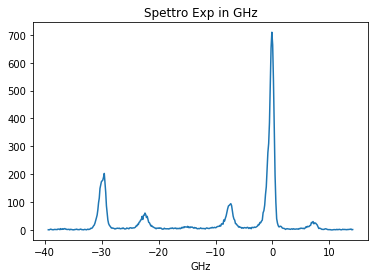

In [2]:
#########  RIPRISTINO I DATI CON CUI HO FATTO I FIT ##############

#implementare salvataggio di x,y e X_VIPA Y_VIPA

#import dati spettro
dati    =   Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y')
n_rows  =   len(dati)
n_cols  =   len(dati[0])
dim     =   n_cols*n_rows
matrix = Initialize_Matrix(n_rows,n_cols)

#definisco quantità di interesse
tempo               =   ()
invisible           =   () 
saturated           =   () 
brillouin_higher    =   ()
boni                =   ()
excluded            =   ()

# %%
#1) Acquisisco VIPA e Spettri
start = time.process_time()
matrix[0][0].Get_VIPA_tif(VIPA_filename, VIPA_path, offset = 183.)


for ii in range(n_rows):
    for jj in range(n_cols):
        print('Passo row = %d/%d col = %d/%d'%(ii,n_rows, jj, n_cols))
        
        matrix[ii][jj].Get_Spectrum(y = np.resize(dati[ii][jj],np.max(dati[ii][jj].shape)) , offset = 183., cut = True, cut_range = (200, 600))
        matrix[ii][jj].Get_Spectrum_Peaks(**syg_kwargs)
        matrix[ii][jj].x_VIPA   =   matrix[0][0].x_VIPA
        matrix[ii][jj].y_VIPA   =   matrix[0][0].y_VIPA

        check   =   matrix[ii][jj].Check_Spectrum(saturation_width = 13.5)
        
        if (check == 1):

            saturated   =   saturated   +   ((ii,jj), )
            excluded    =   excluded    +   ((ii,jj), )


        elif (check == 2):

            brillouin_higher    =   brillouin_higher    +   ((ii,jj),)
            boni                =   boni                +   ((ii,jj),)

        elif (check == 3):

            invisible           =   invisible           +   ((ii,jj),)
            excluded    =   excluded    +   ((ii,jj), )

        
        else:

            boni                =   boni                +   ((ii,jj),)


acq_time    =   time.process_time()-start
tempo       =   tempo + (('acquisizione', acq_time),)
print('tempo impiegato per acquisizione spettri: %f s'%(acq_time))
print('Totale spettri saturati : %d\n'%(len(saturated)), saturated)


print('Totale spettri con Brillouin più alti : %d\n'%(len(brillouin_higher)), brillouin_higher)
print('Totale spettri con Brillouin invisibili: %d\n'%(len(invisible)), invisible)
print('Totale spettri boni :   %d'%(len(boni)))
print('Totale   spettri : %d\ndi cui %d inutilizzabili'%(dim, len(invisible)+len(saturated)))
print('ossia il %3.2f percento'%(float(len(invisible)+len(saturated))*100/dim))
# %%
#2) Faccio operazioni di modifica spettro
excluded    =   saturated + invisible

start = time.process_time()

matrix[0][0].How_Many_Peaks_To_VIPA(treshold = 30)
matrix[0][0].Fit_Pixel2GHz(fig = True)
matrix[0][0].VIPA_Pix2GHz(fig=True)

matrix[0][0].Spectrum_Pix2GHz(fig=True)
matrix[0][0].Get_Spectrum_4_Peaks_by_Height()
matrix[0][0].Cut_n_Estimate_Spectrum(estimate = True, distanza = 0.25)
matrix[0][0].Fit_VIPA_Gaussian()


for ii in range(n_rows):
    for jj in range(n_cols):

        print('Passo row = %d/%d col = %d/%d'%(ii,n_rows, jj, n_cols))

        if ((ii,jj) != (0,0)):
                    
            matrix[ii][jj].x_VIPA_freq   =   matrix[0][0].x_VIPA_freq
            matrix[ii][jj].y_VIPA        =   matrix[0][0].y_VIPA
            
            matrix[ii][jj].Poly2GHz      =   matrix[0][0].Poly2GHz
            matrix[ii][jj].Spectrum_Pix2GHz()

            if (ii,jj) not in excluded:

                if (ii,jj) in brillouin_higher:
                
                    matrix[ii][jj].Get_Spectrum_Peaks(height = 5., distance = 50, width = 5)
                    matrix[ii][jj].Get_Spectrum_4_Peaks_by_Order()
                
                else :
                    #boni
                    matrix[ii][jj].Get_Spectrum_4_Peaks_by_Height()
                    

                matrix[ii][jj].Cut_n_Estimate_Spectrum(distanza = 0.25)

mod_time    =   time.process_time()-start
tempo       =   tempo + (('modifica',mod_time), )
print('tempo impiegato per modifica spettri: %f s'%(mod_time))

In [3]:
#########   RIPRISTINO DATI PARAMETRI DEL FIT PER GLI SPETTRI #############
#########   --> suddivido in p0 (inteso come parametri fittati) e p-gauss
#### faccio due giri: prima recupero da fit marko, poi da fit totale

for (which_fit,k) in zip(('markov','tot'), range(2)):

    fit = ()
    non_fitted = ()
    accomplished = ()
    exceded = ()
    fitted = ()
    lines = ()

    with open(now_path+which_fit+'_fit.txt', 'r') as fin:
        fit     =   eval(fin.read())

    non_fitted, accomplished, exceded, fitted = Unpack_Fit(fit)

    with open(now_path+which_fit+'_fit_params.txt', 'r') as fin:
        lines   =   fin.readlines()

    if (len(fitted) != len(lines)):
        raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(fitted), len(lines)))

    for (line, (ii,jj)) in zip(lines, fitted) :
        print('Passo row = %d/%d col = %d/%d'%(ii,n_rows, jj, n_cols))
        if k ==0:
                        matrix[ii][jj].Recover_Gauss_Parameter(line)
        else:
                        matrix[ii][jj].Recover_Fit_Params(line)



l = 77/84
Passo row = 77/86 col = 78/84
Passo row = 77/86 col = 79/84
Passo row = 77/86 col = 80/84
Passo row = 77/86 col = 81/84
Passo row = 77/86 col = 82/84
Passo row = 77/86 col = 83/84
Passo row = 78/86 col = 0/84
Passo row = 78/86 col = 1/84
Passo row = 78/86 col = 2/84
Passo row = 78/86 col = 3/84
Passo row = 78/86 col = 4/84
Passo row = 78/86 col = 5/84
Passo row = 78/86 col = 6/84
Passo row = 78/86 col = 7/84
Passo row = 78/86 col = 8/84
Passo row = 78/86 col = 9/84
Passo row = 78/86 col = 10/84
Passo row = 78/86 col = 11/84
Passo row = 78/86 col = 12/84
Passo row = 78/86 col = 13/84
Passo row = 78/86 col = 14/84
Passo row = 78/86 col = 15/84
Passo row = 78/86 col = 16/84
Passo row = 78/86 col = 17/84
Passo row = 78/86 col = 18/84
Passo row = 78/86 col = 20/84
Passo row = 78/86 col = 21/84
Passo row = 78/86 col = 22/84
Passo row = 78/86 col = 23/84
Passo row = 78/86 col = 25/84
Passo row = 78/86 col = 26/84
Passo row = 78/86 col = 27/84
Passo row = 78/86 col = 28/84
Passo row 

In [4]:

Omega_map, nans = Get_Parameter_Map('Omega', cols_mark, matrix, n_rows, n_cols, fitted, excluded, cmap = 'seismic', fig = 'Omega_Map', path = now_path)
Omega_map_interpolated = Interpolate_Parameter_Map(Omega_map, 'seismic', fig = 'Omega_Map_Interpolated', path = now_path)


In [6]:
excluded

((18, 38),
 (30, 37),
 (31, 42),
 (35, 35),
 (36, 42),
 (39, 36),
 (41, 35),
 (42, 40),
 (42, 45),
 (43, 40),
 (43, 52),
 (44, 40),
 (45, 52),
 (51, 49),
 (61, 40),
 (71, 35),
 (73, 31),
 (74, 28),
 (3, 15),
 (3, 16),
 (6, 10),
 (6, 45),
 (7, 45),
 (8, 15),
 (11, 36),
 (13, 36),
 (15, 36),
 (15, 38),
 (16, 35),
 (16, 38),
 (17, 36),
 (21, 36),
 (21, 40),
 (23, 38),
 (24, 36),
 (24, 48),
 (25, 31),
 (25, 38),
 (25, 40),
 (25, 42),
 (25, 48),
 (25, 53),
 (26, 36),
 (26, 38),
 (26, 45),
 (27, 31),
 (27, 36),
 (27, 41),
 (27, 42),
 (28, 31),
 (28, 35),
 (28, 38),
 (28, 39),
 (28, 45),
 (29, 35),
 (29, 37),
 (29, 39),
 (29, 42),
 (29, 48),
 (30, 28),
 (30, 31),
 (30, 34),
 (30, 35),
 (30, 36),
 (30, 39),
 (30, 40),
 (30, 45),
 (30, 52),
 (31, 28),
 (31, 31),
 (31, 34),
 (31, 37),
 (31, 39),
 (31, 40),
 (31, 45),
 (31, 53),
 (32, 28),
 (32, 30),
 (32, 35),
 (32, 36),
 (32, 40),
 (32, 52),
 (33, 30),
 (33, 35),
 (33, 40),
 (33, 45),
 (34, 48),
 (34, 53),
 (34, 60),
 (35, 36),
 (35, 47),
 (35,

In [6]:
#ESCLUDO OMEGA_BASSI
print('Prima di esclusione len(excluded) = ',len(excluded))
omega_too_low = Whose_Param_Too_Low('Omega', 4., matrix, boni)
excluded += omega_too_low
print('Adesso gli esclusi misurano ',len(excluded))

Prima di esclusione len(excluded) =  230
(64, 36) ha Omega= 3.79
(64, 47) ha Omega= 3.46
(65, 47) ha Omega= 3.38
(66, 47) ha Omega= 2.58
(67, 47) ha Omega= 1.86
(68, 36) ha Omega= 3.51
(68, 47) ha Omega= 1.60
(69, 47) ha Omega= 1.13
(70, 47) ha Omega= 1.66
(71, 36) ha Omega= 3.99
(71, 47) ha Omega= 1.09
(72, 47) ha Omega= 0.87
(73, 47) ha Omega= 0.87
(74, 47) ha Omega= 0.87
(75, 47) ha Omega= 0.87
(76, 47) ha Omega= 0.87
(77, 47) ha Omega= 0.87
(78, 47) ha Omega= 0.87
(79, 47) ha Omega= 0.87
(80, 36) ha Omega= 3.93
(80, 47) ha Omega= 0.87
(81, 47) ha Omega= 0.87
(82, 47) ha Omega= 0.87
(83, 47) ha Omega= 0.87
(84, 36) ha Omega= 3.93
(84, 47) ha Omega= 0.87
(85, 36) ha Omega= 3.55
(85, 47) ha Omega= 0.87
Adesso gli esclusi misurano  258


In [7]:
#ESCLUDO OMEGA ALTI
print('Prima di esclusione len(excluded) = ',len(excluded))
omega_too_high = Whose_Param_Too_High('Omega', 10., matrix, boni)
excluded += omega_too_high
print('Adesso gli esclusi misurano ',len(excluded))

Prima di esclusione len(excluded) =  258
(65, 19) ha Omega= 11.70
(66, 19) ha Omega= 15.74
(67, 19) ha Omega= 18.88
(68, 19) ha Omega= 20.17
(69, 19) ha Omega= 18.87
(70, 19) ha Omega= 19.06
(71, 19) ha Omega= 18.01
(72, 19) ha Omega= 19.12
(73, 19) ha Omega= 24.46
(74, 19) ha Omega= 29.15
(75, 19) ha Omega= 28.11
(76, 19) ha Omega= 25.66
(77, 19) ha Omega= 27.33
Adesso gli esclusi misurano  271


In [5]:
#ESCLUDO GAMMA ALTI
print('Prima di esclusione len(excluded) = '+len(excluded))
gamma_too_high = Whose_Param_Too_High('Gamma', 1., matrix, boni)
excluded += gamma_too_high
print('Adesso gli esclusi misurano '+len(excluded))

16
(67, 71) ha Gamma= 1.13
(67, 72) ha Gamma= 1.08
(67, 73) ha Gamma= 1.16
(67, 74) ha Gamma= 1.16
(67, 77) ha Gamma= 1.16
(67, 78) ha Gamma= 1.04
(67, 79) ha Gamma= 1.16
(67, 80) ha Gamma= 1.16
(67, 81) ha Gamma= 1.16
(67, 83) ha Gamma= 1.16
(68, 0) ha Gamma= 1.05
(68, 1) ha Gamma= 1.16
(68, 2) ha Gamma= 1.16
(68, 3) ha Gamma= 1.16
(68, 5) ha Gamma= 1.16
(68, 6) ha Gamma= 1.16
(68, 8) ha Gamma= 1.16
(68, 10) ha Gamma= 1.16
(68, 11) ha Gamma= 1.15
(68, 12) ha Gamma= 1.16
(68, 16) ha Gamma= 1.15
(68, 17) ha Gamma= 1.14
(68, 18) ha Gamma= 1.16
(68, 19) ha Gamma= 1.08
(68, 20) ha Gamma= 1.01
(68, 23) ha Gamma= 1.14
(68, 25) ha Gamma= 1.01
(68, 26) ha Gamma= 1.16
(68, 33) ha Gamma= 1.16
(68, 34) ha Gamma= 1.16
(68, 41) ha Gamma= 1.11
(68, 42) ha Gamma= 1.09
(68, 47) ha Gamma= 1.16
(68, 48) ha Gamma= 1.10
(68, 49) ha Gamma= 1.07
(68, 53) ha Gamma= 1.16
(68, 54) ha Gamma= 1.16
(68, 56) ha Gamma= 1.03
(68, 57) ha Gamma= 1.14
(68, 59) ha Gamma= 1.16
(68, 61) ha Gamma= 1.16
(68, 62) ha Gamma= 1

In [7]:
matrix[0][6].Fit_Params['Omega']['Values']

7.469790151782983

In [9]:
Get_Fit_Map(n_rows, n_cols, non_fitted, exceded, excluded, fig = 'Try_Fit_Map', path = try_path)

Completata Fit_Map


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [83]:
from matplotlib import cm
def Get_Fit_Map(n_rows, n_cols, non_fitted, exceded, excluded, fig = False, path = ''):

    """
    Funzione che ritorna e stampa matrice i cui valori sono

    0   se il fit non è stato svolto per quel (ii,jj) perchè già buona stima (solo per fit Markov)

    1   se il fit è stato fatto ed è stato portato a buon termine

    2   se il fit è stato fatto ma ha superato numero max di iterazioni senza convergere

    3   se il fit non è stato svolto perchè elemento escluso

    OSS: essendo che mi aspetto max di fit fatti, genero np.ones()


    """

    fit_map =  np.ones((n_rows, n_cols))

    for ii in range(n_rows):
        for jj in range(n_cols):

            if (ii,jj) in non_fitted:

                fit_map[ii,jj]  =   0.
            
            elif (ii, jj) in exceded:

                fit_map[ii,jj]  =   2.
            
            elif (ii,jj) in excluded:

                fit_map[ii,jj]  =   3.
    
    print('Completata Fit_Map')
    
    if fig:

        c = plt.get_cmap('viridis', 4)
        plt.matshow(fit_map, cmap = c)
        plt.title('Fit Map')
        plt.colorbar(cmap = c,format = '%1i', boundaries= [0,1,2,3,4], values = [0,1,2,3])
        plt.xlabel('Row Index')
        plt.ylabel('Col Idx')
        plt.savefig(path + fig+'.png')
        plt.close()
    
    return fit_map

In [9]:
colonna = ()
jj = 80
for ii in range(n_rows):
    colonna = colonna + ((ii, jj),)
Plot_Elements_Spectrum(matrix, colonna[:20], fit = True)


(0, 80)


AttributeError: 'Spectrum' object has no attribute 'p_gauss'

In [7]:
matrix[0][0].Fit_Params[['Omega', 'tau']].to_dict()

{'Omega': {'Values': 6.751374179469706,
  'StdErrs': 16477542.99401785,
  'Initials': 7.500753460283947},
 'tau': {'Values': 2.040982099056887e-08,
  'StdErrs': 17592.994886453267,
  'Initials': 0.10799339515132358}}

In [7]:
import csv
with open('/home/tesista/Desktop/'+'try.csv', 'w') as f_out:
    csv_writer = csv.writer(f_out, delimiter = ' ')

    for ii in range(n_rows):
        for jj in range(n_cols):

            csv_writer.writerows([matrix[ii][jj].x_freq])
        

In [11]:
import csv
with open('/home/tesista/Desktop/'+'try.txt', 'w') as f_out:
    #csv_writer = csv.writer(f_out, delimiter = ' ')

    for ii in range(n_rows):
        for jj in range(n_cols):

            f_out.write(np.array2string(matrix[ii][jj].x_freq, max_line_width = 10000)+'\n')
            f_out.write(np.array2string(matrix[ii][jj].y, max_line_width = 10000)+'\n')

In [40]:
with open('/home/tesista/Desktop/'+'try.txt', 'r') as f_in:
    #csv_writer = csv.writer(f_out, delimiter = ' ')
    lines = f_in.readlines()


prova = np.array(lines[0][1:len(lines[0])-2].split(), dtype = np.float32)
prova1 = np.array(lines[0][1:len(lines[1])-2].split(), dtype = np.float32)
len(prova) == len(prova1)


False

In [63]:
np.where(np.isnan(p_map) == True)

(array([ 3,  3,  6,  6,  7,  8, 11, 12, 13, 15, 15, 16, 16, 17, 18, 21, 21,
        23, 23, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27,
        28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30,
        30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32,
        32, 32, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 36,
        36, 36, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39,
        40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43, 43,
        43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 46, 46, 46, 46,
        47, 47, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 51, 51,
        51, 51, 51, 51, 52, 52, 52, 53, 53, 53, 53, 53, 53, 54, 55, 55, 55,
        55, 56, 56, 56, 57, 58, 58, 58, 59, 60, 60, 60, 60, 60, 61, 62, 62,
        62, 62, 63, 63, 64, 64, 65, 66, 67, 68, 69, 69, 69, 70, 71, 71, 72,
        72, 73, 73, 73, 73, 73, 74, 74, 74, 75, 75, 76, 76, 77, 77, 77, 77,
        78, 

In [73]:
neigh= Get_Neighbours2D(18,38)
np.nanmean(matrix[kk][ll].Fit_Params[parameter]['Values'] for (kk,ll) in neigh)

AttributeError: 'generator' object has no attribute 'dtype'

In [89]:

    np.nanmean([matrix[kk][ll].Fit_Params[parameter]['Values'] for (kk,ll) in neigh])

7.51461021562717

In [86]:
matrix[kk][ll].Fit_Params[parameter]['Values'] for (kk,ll) in neigh

SyntaxError: invalid syntax (<ipython-input-86-f87392ad582e>, line 1)

In [100]:
len(excluded)
print(excluded)

((18, 38), (30, 37), (31, 42), (35, 35), (36, 42), (39, 36), (41, 35), (42, 40), (42, 45), (43, 40), (43, 52), (44, 40), (45, 52), (51, 49), (61, 40), (71, 35), (73, 31), (74, 28), (3, 15), (3, 16), (6, 10), (6, 45), (7, 45), (8, 15), (11, 36), (12, 38), (13, 36), (15, 36), (15, 38), (16, 35), (16, 38), (17, 36), (21, 36), (21, 40), (23, 38), (23, 39), (24, 36), (24, 48), (25, 31), (25, 38), (25, 40), (25, 42), (25, 48), (25, 53), (26, 36), (26, 38), (26, 45), (27, 31), (27, 36), (27, 41), (27, 42), (28, 15), (28, 31), (28, 35), (28, 38), (28, 39), (28, 45), (29, 35), (29, 37), (29, 39), (29, 42), (29, 48), (30, 28), (30, 31), (30, 34), (30, 35), (30, 36), (30, 39), (30, 40), (30, 45), (30, 52), (31, 28), (31, 31), (31, 34), (31, 37), (31, 39), (31, 40), (31, 45), (31, 53), (32, 28), (32, 30), (32, 35), (32, 36), (32, 40), (32, 52), (33, 30), (33, 35), (33, 40), (33, 45), (34, 48), (34, 53), (34, 60), (35, 36), (35, 47), (35, 53), (36, 35), (36, 40), (36, 44), (36, 45), (36, 52), (37, 

In [102]:
print(Omega_map[18,38])
print(Omega_map_interpolated[18,38])

nan
nan


In [103]:
p_map.shape

(86, 84)

In [7]:
for ii in range(n_rows):
    for jj in range(n_cols):
        if not hasattr(matrix[ii][jj], 'Fit_Params'):

SyntaxError: unexpected EOF while parsing (<ipython-input-7-70a04cecae32>, line 3)